In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from molecule_generation import load_model_from_directory

2024-07-26 05:09:03.069982: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Generate with the scaffold of hypocrellin B as the scaffold

In [15]:
model_dir = "../moler_weights"
encode_smi = 'OC1=CC(OC)=C2C(C(C3=C4OC)=C5C6=C(C(C(OC)=C5C(C(C)=O)=C(C)C3)=O)C(O)=CC(OC)=C26)=C1C4=O'
example_smiles = [encode_smi]
scaffold = MurckoScaffoldSmiles(encode_smi)

with load_model_from_directory(model_dir) as model:
    embeddings = model.encode(example_smiles)
    print(f"Embedding shape: {embeddings[0].shape}")
    noise = np.random.normal(0, 0.5, (10, embeddings[0].shape[-1]))
    noise = noise.astype(embeddings[0].dtype)
    noise_embedding = embeddings[0] + noise
    print(noise_embedding.shape)

    # Decode without a scaffold constraint.
    decoded = model.decode(embeddings)

    # The i-th scaffold will be used when decoding the i-th latent vector.
    decoded_scaffolds = model.decode(noise_embedding, scaffolds=[scaffold]*len(noise_embedding))

    print(f"Encoded: {example_smiles}")
    print(f"Decoded: {decoded}")
    print(f"Decoded with scaffolds: {decoded_scaffolds}")

Loading a trained model from: ../moler_weights/GNN_Edge_MLP_MoLeR__2022-02-24_07-16-23_best.pkl


2024-07-26 05:20:25.214055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: /usr/lib/x86_64-linux-gnu/libcuda.so.1: file too short; LD_LIBRARY_PATH: /opt/tiger/native_libhdfs/lib/native:/opt/tiger/jdk/jdk8u265-b01/jre/lib/amd64/server:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deploy/hadoop/lib/native/ufs:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lzo/lib:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lzo/lib:
2024-07-26 05:20:25.217020: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-26 05:20:25.217619: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mlxlabnjj95mov64cb5a20-20230803074120-s247ev-master): /proc/driv

Embedding shape: (512,)
(10, 512)
Encoded: ['OC1=CC(OC)=C2C(C(C3=C4OC)=C5C6=C(C(C(OC)=C5C(C(C)=O)=C(C)C3)=O)C(O)=CC(OC)=C26)=C1C4=O']
Decoded: ['COC1=CC2=C(C=C1)C(=O)C1=C(O2)C(C(=O)C2=C(O)C=C3C=CC4=CC(C)=CC(C(C)=O)=C4C3=C2O)=C(O)C=C1O']
Decoded with scaffolds: ['COC(=O)C=CC(=O)OCC1=CC(=O)C2=C(C)C(=O)C3=C(O)C=CC4=C5C=CC(O)=C6C(=O)C=C1C(=C56)C2=C43', 'COCC(=O)OCC1=CC(=O)C2=C(C(C)=O)C(=O)C3=C(O)C=CC4=C5C=CC(O)=C6C(=O)C=C1C(=C56)C2=C43', 'CC(=O)NC1=C2C(=O)C(COC(=O)CCCOC(=O)C=CCNCN)=CC3=CC(=O)C4=C(O)C=CC5=C6C=CC(O)=C(C1=O)C6=C2C3=C54', 'COC1=C2C(=O)C(NC(C)=O)=C3C(=O)C(C(C)=O)=CC4=CC(=O)C5=C(OCC(O)C(C)(C)O)C=CC6=C(C=C1)C2=C3C4=C65', 'COCCNC(=O)OCC1=CC(=O)C2=CC(=O)C3=C(O)C=CC4=C5C=CC(O)=C6C(=O)C=C1C(=C56)C2=C43', 'COC1=CC2=C(C3=CC(=O)C4=C(O)C=CC5=C6C=CC(O)=C7C(=O)C(C(C)=O)=C(C2=O)C(=C67)C3=C54)C(OC)=C1O', 'CC(=O)C1=C(O)C2=CC(=O)C3=C(OCC(O)C(C)(C)O)C=CC4=C5C=CC(O)=C6C(=O)C=C(C1=O)C(=C56)C2=C43', 'CC(=O)C1=CC2=CC(=O)C3=C(O)C=CC4=C5C=CC(O)=C6C(=O)C(O)=C(C1=O)C(=C56)C2=C43', 'COC1=C2C(=O)C=C3C(=O

Encoded molecule


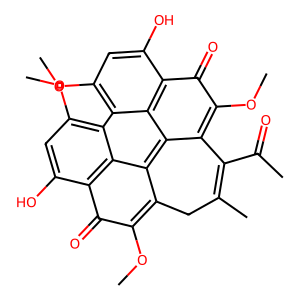

Scaffold for generation


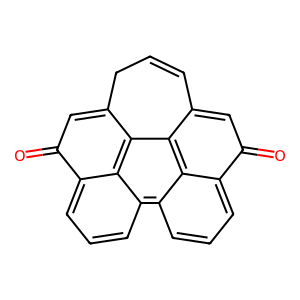

In [13]:
mol = Chem.MolFromSmiles(example_smiles[0])
print('Encoded molecule')
Draw.MolToImage(mol).show()
mol = Chem.MolFromSmiles(scaffold)
print('Scaffold for generation')
Draw.MolToImage(mol).show()

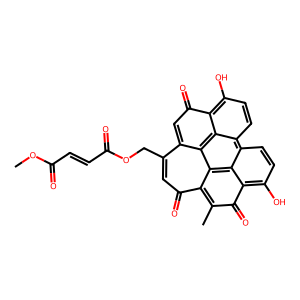

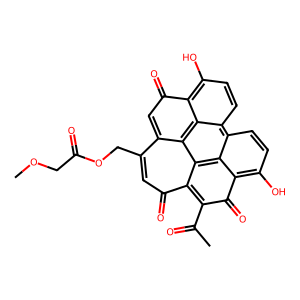

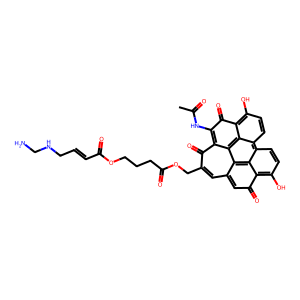

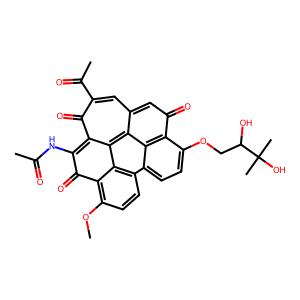

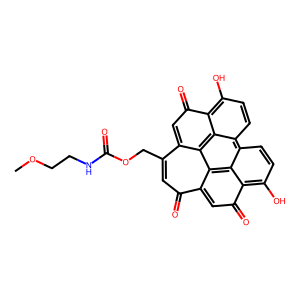

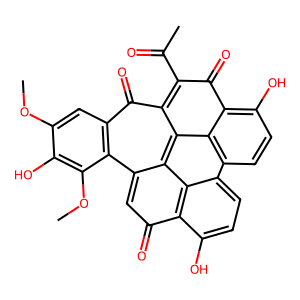

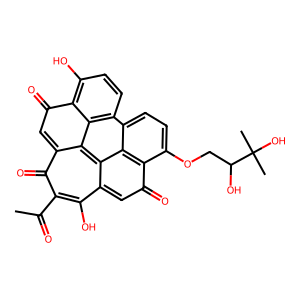

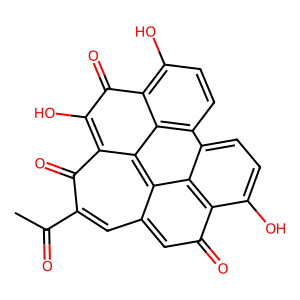

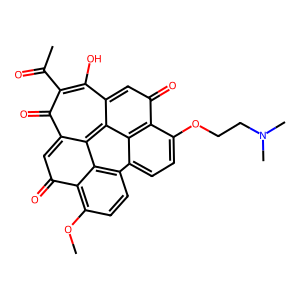

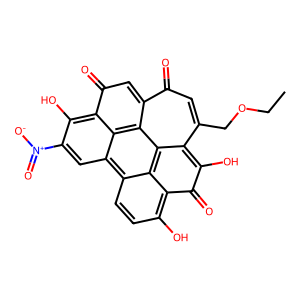

In [16]:
for i in range(len(decoded_scaffolds)):
    mol = Chem.MolFromSmiles(decoded_scaffolds[i])
    img = Draw.MolToImage(mol)
    # print(type(img))
    img.show()

# Generate with Hypocrllin B as the scaffold

In [5]:
model_dir = "../moler_weights"
encode_smi = 'OC1=CC(OC)=C2C(C(C3=C4OC)=C5C6=C(C(C(OC)=C5C(C(C)=O)=C(C)C3)=O)C(O)=CC(OC)=C26)=C1C4=O'
example_smiles = [encode_smi]
scaffold = encode_smi

with load_model_from_directory(model_dir) as model:
    embeddings = model.encode(example_smiles)
    print(f"Embedding shape: {embeddings[0].shape}")
    noise = np.random.normal(0, 0.7, (10, embeddings[0].shape[-1]))
    noise = noise.astype(embeddings[0].dtype)
    noise_embedding = embeddings[0] + noise
    print(noise_embedding.shape)

    # Decode without a scaffold constraint.
    decoded = model.decode(embeddings)

    # The i-th scaffold will be used when decoding the i-th latent vector.
    decoded_scaffolds = list(set(model.decode(noise_embedding, scaffolds=[scaffold]*len(noise_embedding))))

    print(f"Encoded: {example_smiles}")
    print(f"Decoded: {decoded}")
    print(f"Decoded with scaffolds: {decoded_scaffolds}")

Loading a trained model from: ../moler_weights/GNN_Edge_MLP_MoLeR__2022-02-24_07-16-23_best.pkl


2024-07-22 03:47:19.866397: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: /usr/lib/x86_64-linux-gnu/libcuda.so.1: file too short; LD_LIBRARY_PATH: /opt/tiger/native_libhdfs/lib/native:/opt/tiger/jdk/jdk8u265-b01/jre/lib/amd64/server:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deploy/hadoop/lib/native/ufs:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lzo/lib:/opt/tiger/yarn_deploy/hadoop/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lib/native:/opt/tiger/yarn_deploy/hadoop_current/lzo/lib:
2024-07-22 03:47:19.871025: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-07-22 03:47:19.871750: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mlxlabnjj95mov64cb5a20-20230803074120-s247ev-master): /proc/driv

Embedding shape: (512,)
(10, 512)
Encoded: ['OC1=CC(OC)=C2C(C(C3=C4OC)=C5C6=C(C(C(OC)=C5C(C(C)=O)=C(C)C3)=O)C(O)=CC(OC)=C26)=C1C4=O']
Decoded: ['COC1=CC2=C(C=C1)C(=O)C1=C(O2)C(C(=O)C2=C(O)C=C3C=CC4=CC(C)=CC(C(C)=O)=C4C3=C2O)=C(O)C=C1O']
Decoded with scaffolds: ['COC1=CC(O)=C2C(=O)C(OC)=C3CC(C)=C(C(C)=O)C4=C(OC)C(=O)C5=C(O)C=C(OC)C6=C5C4=C3C2=C16', 'COC1=CC(OC)=C2C(=O)C(OC)=C3CC(C=CC=C(C)C(=O)NNC(N)=O)=C(C(C)=O)C4=C(OC)C(=O)C5=C(OC)C=C(OC)C6=C5C4=C3C2=C16', 'CN=CC1=C(C(C)=O)C2=C(OC)C(=O)C3=C(O)C=C(OC)C4=C3C2=C2C(=C(OC)C(=O)C3=C(O)C=C(OC)C4=C32)C1', 'COC1=CC(O)=C2C(=O)C(OC)=C3CC(C=NC4=CC=C(C)C=C4)=C(C(C)=O)C4=C(OC)C(=O)C5=C(O)C=C(OC)C6=C5C4=C3C2=C16', 'COC1=CC(O)=C2C(=O)C(OC)=C3C(C(C)=O)=C(CC=C(C)CCC=C(C)C)CC4=C(OC)C(=O)C5=C(O)C(NC(C)=O)=C(OC)C6=C5C4=C3C2=C16', 'COC1=CC(OC)=C2C(=O)C(OC)=C3CC(C)=C(C(C)=O)C4=C(OC)C(=O)C5=C(O)C=C(OC)C6=C5C4=C3C2=C16', 'COC1=CC(O)=C2C(=O)C(OC)=C3CC(C#N)=C(C(C)=O)C4=C(OC)C(=O)C5=C(O)C=C(OC)C6=C5C4=C3C2=C16', 'COC1=CC(O)=C2C(=O)C(OCC3=CC=CC=C3)=C3CC(C)=C(C(C)=

Encoded molecule


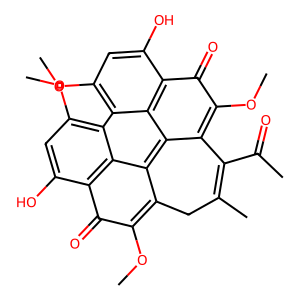

Scaffold for generation


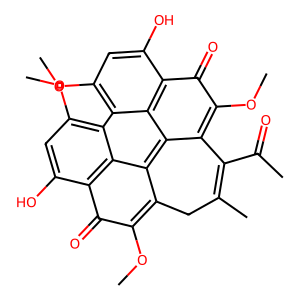

In [16]:
mol = Chem.MolFromSmiles(example_smiles[0])
print('Encoded molecule')
Draw.MolToImage(mol).show()
mol = Chem.MolFromSmiles(scaffold)
print('Scaffold for generation')
Draw.MolToImage(mol).show()

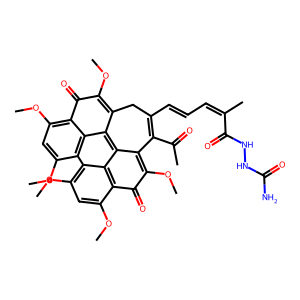

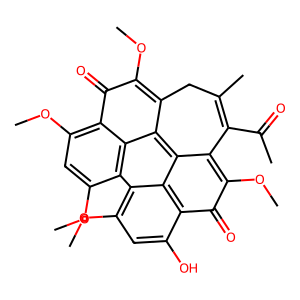

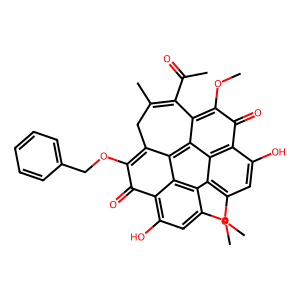

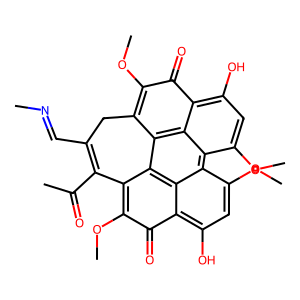

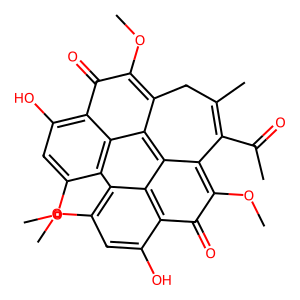

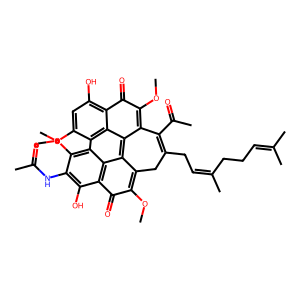

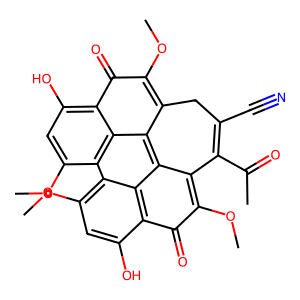

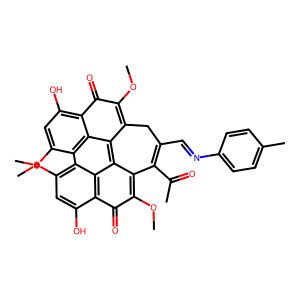

In [12]:
for i in range(len(decoded_scaffolds)):
    mol = Chem.MolFromSmiles(decoded_scaffolds[i])
    img = Draw.MolToImage(mol)
    # print(type(img))
    img.show()